In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter

%matplotlib inline


In [2]:
# Transforma o arquivo html em dataframe do pandas.

df = pd.read_html('d_mega.htm')
df = df[0]

In [3]:
# Lendo primeiras linhas do DataFrame

df.head()

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,...,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1,11/03/1996,41,5,4,52,30,33,000,0,...,&nbsp,000,17,39.15892,2016,33021.0,SIM,1.714.65023,000,000
1,2,18/03/1996,9,39,37,49,43,41,000,1,...,PR,2.307.16223,65,14.42402,4488,20891.0,NÃO,000,000,000
2,3,25/03/1996,36,30,10,11,29,47,000,2,...,RN,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
3,3,25/03/1996,36,30,10,11,29,47,000,2,...,SP,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
4,4,01/04/1996,6,59,42,27,1,5,000,0,...,&nbsp,000,39,15.32224,3311,18048.0,SIM,717.08075,000,000


In [4]:
# Remove os concursos duplicado. Os concursos com mais de um ganhador aparecem múltiplas 
# vezes devido conversão do html para dataframe

df.drop_duplicates(subset = 'Concurso', keep= 'first', inplace=True)

In [5]:
df.head()

,Concurso,Data Sorteio,1ª Dezena,2ª Dezena,3ª Dezena,4ª Dezena,5ª Dezena,6ª Dezena,Arrecadacao_Total,Ganhadores_Sena,...,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1,11/03/1996,41,5,4,52,30,33,000,0,...,&nbsp,000,17,39.15892,2016,33021.0,SIM,1.714.65023,000,000
1,2,18/03/1996,9,39,37,49,43,41,000,1,...,PR,2.307.16223,65,14.42402,4488,20891.0,NÃO,000,000,000
2,3,25/03/1996,36,30,10,11,29,47,000,2,...,RN,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
4,4,01/04/1996,6,59,42,27,1,5,000,0,...,&nbsp,000,39,15.32224,3311,18048.0,SIM,717.08075,000,000
5,5,08/04/1996,1,19,46,6,16,2,000,0,...,&nbsp,000,98,5.31810,5399,9653.0,SIM,1.342.48885,000,000


In [6]:
# Renomeando Colunas do DataFrame

df = df.rename(columns={'Data Sorteio': 'Data_Sorteio', '1ª Dezena' : 'D1', '2ª Dezena' : 'D2', '3ª Dezena' : 'D3',
                       '4ª Dezena' : 'D4', '5ª Dezena' : 'D5', '6ª Dezena' : 'D6'})

In [7]:
# Lendo primeiras linhas do DataFrame

df.head()

,Concurso,Data_Sorteio,D1,D2,D3,D4,D5,D6,Arrecadacao_Total,Ganhadores_Sena,...,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1,11/03/1996,41,5,4,52,30,33,000,0,...,&nbsp,000,17,39.15892,2016,33021.0,SIM,1.714.65023,000,000
1,2,18/03/1996,9,39,37,49,43,41,000,1,...,PR,2.307.16223,65,14.42402,4488,20891.0,NÃO,000,000,000
2,3,25/03/1996,36,30,10,11,29,47,000,2,...,RN,391.19251,62,10.51593,4261,15301.0,NÃO,000,000,000
4,4,01/04/1996,6,59,42,27,1,5,000,0,...,&nbsp,000,39,15.32224,3311,18048.0,SIM,717.08075,000,000
5,5,08/04/1996,1,19,46,6,16,2,000,0,...,&nbsp,000,98,5.31810,5399,9653.0,SIM,1.342.48885,000,000


In [8]:
# Excluindo colunas que não serão utilizadas neste estudo

df = df.drop(columns=['Ganhadores_Quina', 'Rateio_Quina', 'Ganhadores_Quadra', 'Rateio_Quadra', 'Estimativa_Prêmio', 'Acumulado_Mega_da_Virada'])

In [9]:
# Lendo primeiras linhas do DataFrame

df.head()

,Concurso,Data_Sorteio,D1,D2,D3,D4,D5,D6,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Acumulado,Valor_Acumulado
0,1,11/03/1996,41,5,4,52,30,33,000,0,&nbsp,&nbsp,000,SIM,1.714.65023
1,2,18/03/1996,9,39,37,49,43,41,000,1,NaN,PR,2.307.16223,NÃO,000
2,3,25/03/1996,36,30,10,11,29,47,000,2,NaN,RN,391.19251,NÃO,000
4,4,01/04/1996,6,59,42,27,1,5,000,0,&nbsp,&nbsp,000,SIM,717.08075
5,5,08/04/1996,1,19,46,6,16,2,000,0,&nbsp,&nbsp,000,SIM,1.342.48885


In [10]:
# Salva como arquivo csv

df.to_csv('dataset_megasena.csv', index = False)

In [11]:
# Ler arquivo CSV

df = pd.read_csv('dataset_megasena.csv', encoding='utf-8', sep=',')

In [12]:
# Lendo primeiras linhas do DataFrame

df.head()

,Concurso,Data_Sorteio,D1,D2,D3,D4,D5,D6,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Acumulado,Valor_Acumulado
0,1,11/03/1996,41,5,4,52,30,33,000,0,&nbsp,&nbsp,000,SIM,1.714.65023
1,2,18/03/1996,9,39,37,49,43,41,000,1,NaN,PR,2.307.16223,NÃO,000
2,3,25/03/1996,36,30,10,11,29,47,000,2,NaN,RN,391.19251,NÃO,000
3,4,01/04/1996,6,59,42,27,1,5,000,0,&nbsp,&nbsp,000,SIM,717.08075
4,5,08/04/1996,1,19,46,6,16,2,000,0,&nbsp,&nbsp,000,SIM,1.342.48885


In [13]:
# Criando coluna somente com o ano do sorteio

df['Ano_Sorteio'] = pd.DatetimeIndex(df['Data_Sorteio']).year 

In [14]:
# Criando coluna somente com o mês do sorteio

df['Mes_Sorteio'] = pd.DatetimeIndex(df['Data_Sorteio']).month

In [15]:
# Criando coluna somente com o dia do sorteio

df['Dia_Sorteio'] = pd.DatetimeIndex(df['Data_Sorteio']).day

In [16]:
# Lendo primeiras linhas do DataFrame

df.head()

,Concurso,Data_Sorteio,D1,D2,D3,D4,D5,D6,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Acumulado,Valor_Acumulado,Ano_Sorteio,Mes_Sorteio,Dia_Sorteio
0,1,11/03/1996,41,5,4,52,30,33,000,0,&nbsp,&nbsp,000,SIM,1.714.65023,1996,11,3
1,2,18/03/1996,9,39,37,49,43,41,000,1,NaN,PR,2.307.16223,NÃO,000,1996,3,18
2,3,25/03/1996,36,30,10,11,29,47,000,2,NaN,RN,391.19251,NÃO,000,1996,3,25
3,4,01/04/1996,6,59,42,27,1,5,000,0,&nbsp,&nbsp,000,SIM,717.08075,1996,1,4
4,5,08/04/1996,1,19,46,6,16,2,000,0,&nbsp,&nbsp,000,SIM,1.342.48885,1996,8,4


In [17]:
# Reordenando as colunas do DataFrame

df = df[['Concurso', 'Data_Sorteio', 'Ano_Sorteio', 'Mes_Sorteio','Dia_Sorteio', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6',
       'Arrecadacao_Total', 'Ganhadores_Sena', 'Rateio_Sena', 'Acumulado', 'Valor_Acumulado', 'Cidade', 'UF']]

In [18]:
# Lendo primeiras linhas do DataFrame

df.head()

,Concurso,Data_Sorteio,Ano_Sorteio,Mes_Sorteio,Dia_Sorteio,D1,D2,D3,D4,D5,D6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Acumulado,Valor_Acumulado,Cidade,UF
0,1,11/03/1996,1996,11,3,41,5,4,52,30,33,000,0,000,SIM,1.714.65023,&nbsp,&nbsp
1,2,18/03/1996,1996,3,18,9,39,37,49,43,41,000,1,2.307.16223,NÃO,000,NaN,PR
2,3,25/03/1996,1996,3,25,36,30,10,11,29,47,000,2,391.19251,NÃO,000,NaN,RN
3,4,01/04/1996,1996,1,4,6,59,42,27,1,5,000,0,000,SIM,717.08075,&nbsp,&nbsp
4,5,08/04/1996,1996,8,4,1,19,46,6,16,2,000,0,000,SIM,1.342.48885,&nbsp,&nbsp


In [19]:
# Retirando os pontos da String da coluna 'Arrecadacao_Total'

df['Arrecadacao_Total'] = df['Arrecadacao_Total'].map(lambda x: x.replace('.', ''))

In [20]:
# Retirando os pontos da String da coluna 'Rateio.Sena'
df['Rateio_Sena'] = df['Rateio_Sena'].map(lambda x: x.replace('.',''))

In [21]:
# Retirando os pontos da String da coluna 'Valor_Acumulado'
df['Valor_Acumulado'] = df['Valor_Acumulado'].map(lambda x: x.replace('.',''))

In [22]:
# Lendo primeiras linhas do DataFrame

df.tail()

,Concurso,Data_Sorteio,Ano_Sorteio,Mes_Sorteio,Dia_Sorteio,D1,D2,D3,D4,D5,D6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Acumulado,Valor_Acumulado,Cidade,UF
2256,2257,02/05/2020,2020,2,5,18,30,21,31,34,51,4619774250,0,000,SIM,4686759763,&nbsp,&nbsp
2257,2258,05/05/2020,2020,5,5,26,7,1,23,14,5,3821175900,0,000,SIM,5092597303,&nbsp,&nbsp
2258,2259,07/05/2020,2020,7,5,54,56,58,20,27,41,5359683600,0,000,SIM,7165101629,&nbsp,&nbsp
2259,2260,09/05/2020,2020,9,5,37,12,14,34,35,47,7183513350,0,000,SIM,7928044623,&nbsp,&nbsp
2260,2261,13/05/2020,2020,5,13,23,26,51,27,29,7,8818464600,0,000,SIM,8864631702,&nbsp,&nbsp


In [23]:
# Transformando a a coluna 'Arrecadacao_Total' de string para numérico.

df['Arrecadacao_Total'] = pd.to_numeric(df['Arrecadacao_Total'])

In [24]:
# Transformando a a coluna 'Rateio_Sena' de string para numérico.

df['Rateio_Sena'] = pd.to_numeric(df['Rateio_Sena'])

In [25]:
# Transformando a a coluna 'Valor_Acumulado' de string para numérico.

df['Valor_Acumulado'] = pd.to_numeric(df['Valor_Acumulado'])

In [26]:
# Transformando a a coluna 'Data_Sorteio' de string para Datatime.

df['Data_Sorteio'] = pd.to_datetime(df['Data_Sorteio'])

In [27]:
# Transformando a a coluna 'Ano_Sorteio' de string para Datatime.

#df['Ano_Sorteio'] = pd.to_datetime(df['Ano_Sorteio'])

In [28]:
# Transformando a a coluna 'Mes_Sorteio' de string para Datatime.

#df['Mes_Sorteio'] = pd.to_datetime(df['Mes_Sorteio'])

In [29]:
# Transformando a a coluna 'Dia_Sorteio' de string para Datatime.

#df['Dia_Sorteio'] = pd.to_datetime(df['Dia_Sorteio'])

In [30]:
# Verificando informação sobre o DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Concurso           2261 non-null   int64         
 1   Data_Sorteio       2261 non-null   datetime64[ns]
 2   Ano_Sorteio        2261 non-null   int64         
 3   Mes_Sorteio        2261 non-null   int64         
 4   Dia_Sorteio        2261 non-null   int64         
 5   D1                 2261 non-null   int64         
 6   D2                 2261 non-null   int64         
 7   D3                 2261 non-null   int64         
 8   D4                 2261 non-null   int64         
 9   D5                 2261 non-null   int64         
 10  D6                 2261 non-null   int64         
 11  Arrecadacao_Total  2261 non-null   int64         
 12  Ganhadores_Sena    2261 non-null   int64         
 13  Rateio_Sena        2261 non-null   int64         
 14  Acumulad

In [31]:
df2 = df.copy()

In [32]:
df2 = df2.groupby(['Data_Sorteio','Ano_Sorteio']) [['Arrecadacao_Total', 'Rateio_Sena', 'Valor_Acumulado']].sum()

In [33]:
df2.head()

,,Arrecadacao_Total,Rateio_Sena,Valor_Acumulado
Data_Sorteio,Ano_Sorteio,,,
1996-01-04,1996,0,0,71708075
1996-01-07,1996,0,678986908,0
1996-01-09,1996,0,0,189246930
1996-01-12,1996,0,0,1345611133
1996-03-06,1996,0,0,194020535


In [34]:
# Resetando o indice no DataFrame df2

df2.reset_index(inplace=True)

In [35]:
# Selecionando somente as colunas Ano_Sorteio e Arrecadacao_Total para novo gráfico

df2 = pd.DataFrame(df2[['Data_Sorteio','Ano_Sorteio', 'Arrecadacao_Total', 'Rateio_Sena', 'Valor_Acumulado']])

In [36]:
# Transformando a coluna Data_Sorteio em indice.

df2.set_index('Data_Sorteio', inplace=True)

In [37]:
df2.head()

,Ano_Sorteio,Arrecadacao_Total,Rateio_Sena,Valor_Acumulado
Data_Sorteio,,,,
1996-01-04,1996,0,0,71708075
1996-01-07,1996,0,678986908,0
1996-01-09,1996,0,0,189246930
1996-01-12,1996,0,0,1345611133
1996-03-06,1996,0,0,194020535


In [38]:
df_Arrecadacao_Total = pd.DataFrame(df2['Arrecadacao_Total'].nlargest(5))

In [39]:
df_Arrecadacao_Total

,Arrecadacao_Total
Data_Sorteio,
2019-12-31,102888210150
2017-12-31,89094736850
2018-12-31,88604836600
2014-12-31,87131816000
2013-12-31,75821897800


In [40]:
df_Arrecadacao_Total.reset_index(inplace=True)

In [41]:
def currency(x, pos):
    'The two args are the value and tick position'

    if x >= 1000000:
        return 'R$ {:1.0f}M'.format(x*1e-9)
    else:
        return 'R$ {:1.0f}K'.format(x*1e-6)

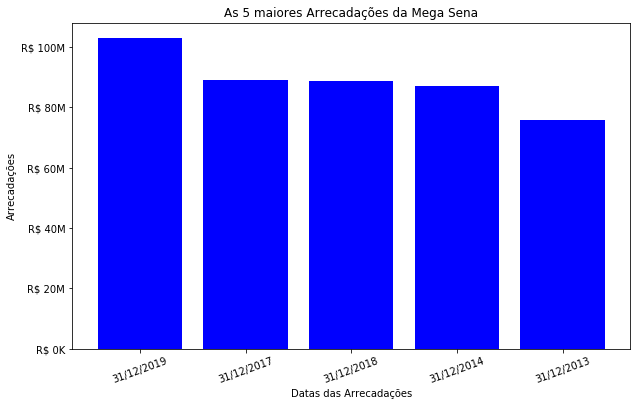

In [42]:
# Plotagem do gráfico de barras.

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(df_Arrecadacao_Total.index, df_Arrecadacao_Total['Arrecadacao_Total'], color='blue')
plt.xticks(df_Arrecadacao_Total.index, df_Arrecadacao_Total['Data_Sorteio'].dt.strftime('%d/%m/%Y'), rotation=20)
plt.ylabel("Arrecadações")
plt.xlabel("Datas das Arrecadações")
plt.title("As 5 maiores Arrecadações da Mega Sena")
formatter = FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter) 

In [43]:
df2['Arrecadacao_Total'].sum()/100

59583078288.25

In [44]:
df_Rateio_Sena = pd.DataFrame(df2['Rateio_Sena'].nlargest(5))

In [45]:
df_Rateio_Sena

,Rateio_Sena
Data_Sorteio,
2019-11-05,28942086500
2015-11-25,20532975389
2019-06-19,12420962825
2019-09-18,12008514397
2010-06-10,11914214427


In [46]:
df_Rateio_Sena.reset_index(inplace=True)

In [47]:
def currency2(x, pos):
    'The two args are the value and tick position'

    if x >= 1000000:
        return 'R$ {:1.0f}M'.format(x*1e-8)
    else:
        return 'R$ {:1.0f}K'.format(x*1e-6)

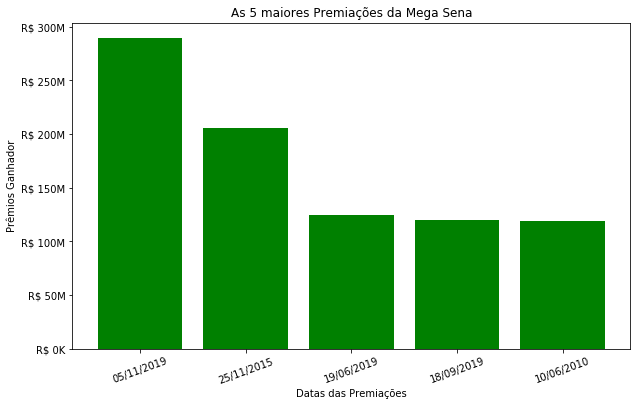

In [48]:
# Plotagem do gráfico de barras.

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(df_Rateio_Sena.index, df_Rateio_Sena['Rateio_Sena'], color='green')
plt.xticks(df_Rateio_Sena.index, df_Rateio_Sena['Data_Sorteio'].dt.strftime('%d/%m/%Y'), rotation=20)
plt.ylabel("Prêmios Ganhador")
plt.xlabel("Datas das Premiações")
plt.title("As 5 maiores Premiações da Mega Sena")
formatter = FuncFormatter(currency2)
ax.yaxis.set_major_formatter(formatter) 

In [102]:
df3 = df2.copy()

In [103]:
df3.reset_index(inplace=True)

In [104]:
df3 = df3.groupby(['Ano_Sorteio'])[['Arrecadacao_Total', 'Valor_Acumulado' ]].sum()

In [105]:
df3

,Arrecadacao_Total,Valor_Acumulado
Ano_Sorteio,,
1996,0,20540562205
1997,0,25359855522
1998,2018015600,36018237307
1999,0,37226496440
2000,0,27575143802
2001,0,36944027430
2002,0,64158421217
2003,0,74467681620
2004,0,105164532374


In [93]:
df3.reset_index(inplace=True)
df3

,Ano_Sorteio,Arrecadacao_Total,Valor_Acumulado
0,1996,0,20540562205
1,1997,0,25359855522
2,1998,2018015600,36018237307
3,1999,0,37226496440
4,2000,0,27575143802
5,2001,0,36944027430
6,2002,0,64158421217
7,2003,0,74467681620
8,2004,0,105164532374
9,2005,0,127261143549


In [101]:
df3 = df3.iloc=[0:12]

SyntaxError: invalid syntax (<ipython-input-101-880bb91b3728>, line 1)

In [95]:
# Criando uma função para formatar a coluna Y do gráfico de barras.

def currency2(x, pos):
    'The two args are the value and tick position'

    if x >= 100000000000:
        return 'R${:1.0f}B' .format(x*1e-11)
    else:
        return 'R${:1.0f}K'.format(x*1e-6)

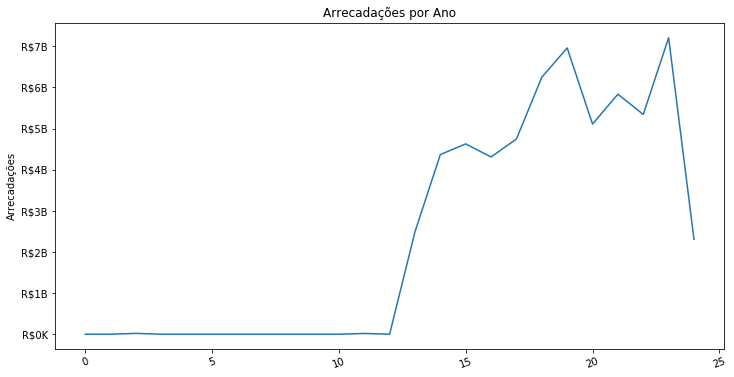

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df3['Arrecadacao_Total'])
plt.xticks(rotation=20)
plt.ylabel("Arrecadações")
plt.title("Arrecadações por Ano")
formatter = FuncFormatter(currency2)
ax.yaxis.set_major_formatter(formatter) 